# Monte Carlo method

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import math as m
from Utils import utils

# Generation of discrete random variables

## Coin toss

In this example we want to simulate the histogram $b(x;N=10,p=0.5)$, where the probability $p_i$ associated with each channel is computed as: 
$$b(x_i;10,0.5) \sim f_i \pm \sqrt{\frac{f_i(1-f_i)}{N}}$$

### Method (1) - simulate the experiment.
1. Generate 10 random numbers $\xi_1,...,\xi_{10}$;
2. Count how many times, $x$, $\xi_{i} < 0.5$;
3. Repete steps 1 and 2 for N times and record the results in an histogram.

In [5]:
prove = 20000
histo1 = np.zeros(11)                                                           
bincenters = np.arange(11)                                                      # bincenters = [0 , 1 , 2 , 3 , 4, 5, 6, 7, 8, 9, 10] possible outcomes.

np.random.seed(42)

for i in range(prove):
  x1 = np.random.rand(10)                                                       # 1) Simulate a vector "x" composed of 10 float between 0 and 1
  app = np.sum(x1>0.5)                                                          # 2) Count how many elements of "x"
                                                                                #    are heads and save the result in a vector "counts" with 1000 entries 
  histo1[int(app)] = histo1[int(app)] + 1
                                                              
freq1 = histo1/prove                                                            # 4) Transform counts in frequencies
err_freq1 = np.sqrt(freq1*(1-freq1)/prove)                                      # 5) Compute the error on frequencies

### Method (2) - Cumulative function.
The cumulative function of a probabilistic distibution always maps its domain between 0 and 1. Then, it is possible to execute random extractions in this range assming they represent the cumulative function of the distribution we want to represent:

$$ F_j = \sum_{k = 0}^j p_k $$

Repete N times:
1. Generate a random number $\xi_i$ uniformely in [0,1].
2. Find the index $j$ which verify the inequality:
\begin{align}
F_{j-1} < \xi_i \le F_j \\
\end{align}
3. Put $X = x_j$

In [8]:
cum = [0, 0.001, 0.011, 0.055, 0.172, 0.377, 0.623, 0.828,                      # 1) Declare cumulative values.
       0.945, 0.989, 0.999, 1.]
spettro = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]                                    # 2) Declare spectrum of possible events. 
histo2 = np.zeros(len(spettro))

for i in range(prove):
  x2 = np.random.rand()                                                         # 3) Uniform extraction of a random number in range [0,1].
  index = utils.binary_search(x2, cum)                                          # 4) Bisection algorithm to find extremes of the cumulative interval.
  histo2[index] = histo2[index] + 1                                                                              

# Clacolo della frequenza
freq2 = histo2/prove                                                            # 6) Transfor counts in frequencies.
err_freq2 = np.sqrt(freq2*(1-freq2)/prove)                                      # 7) Compute the error on frequencies.

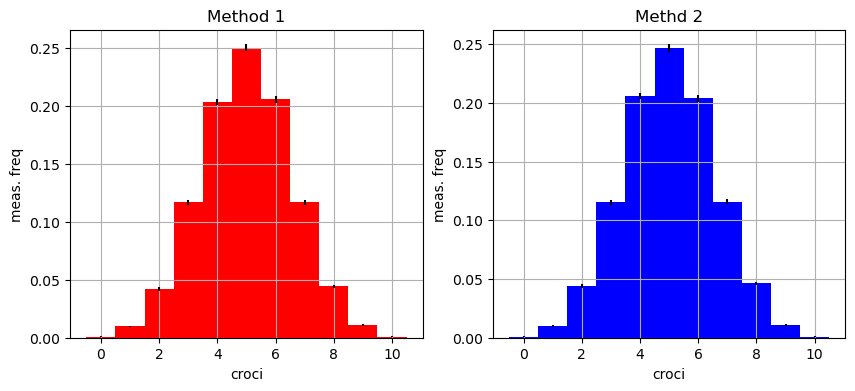


Method 1:
Sample mean = 5.012 +/- 0.011
Sample std = 1.579 +/- 0.008 (non gaussian xi)
Sample std = 1.579 +/- 0.008 (xi gaussian approximation)

Method 2:
Sample mean = 5.009 +/- 0.011
Sample std = 1.588 +/- 0.008 (non gaussian xi)
Sample std = 1.588 +/- 0.008 (xi gaussian approximation)


In [9]:
f=plt.figure(figsize=(10, 4))

ax1=plt.subplot(1, 2, 1)
ax1.bar(bincenters, freq1, width = 1, color='r', yerr=err_freq1)
ax1.set_title('Method 1')
ax1.set_xlabel('croci')
ax1.set_ylabel('meas. freq')
ax1.grid(True)

ax2=plt.subplot(1, 2, 2)
ax2.bar(spettro, freq2, width = 1, color='b',yerr=err_freq2)
ax2.set_title('Methd 2')
ax2.set_xlabel('croci')
ax2.set_ylabel('meas. freq')
ax2.grid(True)

plt.show()

print()
print("Method 1:")
print("Sample mean = {:.3f} +/- {:.3f}". format(utils.SAMPLE_MEAN(prove,histo1,bincenters), utils.ERROR_SAMPLE_MEAN(prove, histo1, bincenters)))
print("Sample std = {:.3f} +/- {:.3f} (non gaussian xi)". format(utils.STD_ESTIMATED(prove,histo1,bincenters),utils.ERRORE_STD_ESTIMATED_NO_X_GAUSS(prove, histo1, bincenters)))
print("Sample std = {:.3f} +/- {:.3f} (xi gaussian approximation)". format(utils.STD_ESTIMATED(prove,histo1,bincenters),utils.ERROR_STD_ESTIMATED_YES_X_GAUSS(prove, histo1, bincenters)))
print()
print("Method 2:")
print("Sample mean = {:.3f} +/- {:.3f}". format(utils.SAMPLE_MEAN(prove,histo2,bincenters),utils.ERROR_SAMPLE_MEAN(prove, histo2, bincenters)))
print("Sample std = {:.3f} +/- {:.3f} (non gaussian xi)". format(utils.STD_ESTIMATED(prove,histo2,bincenters),utils.ERRORE_STD_ESTIMATED_NO_X_GAUSS(prove, histo2, bincenters)))
print("Sample std = {:.3f} +/- {:.3f} (xi gaussian approximation)". format(utils.STD_ESTIMATED(prove,histo2,bincenters),utils.ERROR_STD_ESTIMATED_YES_X_GAUSS(prove, histo2, bincenters)))


## Throwing a pair of dice
![buffon](Img/dice.png)

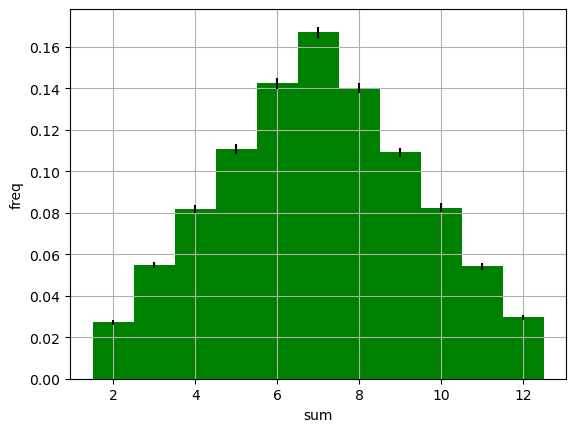

In [11]:
# Define the cumulative function and the possible events.
cum = [0., 1/36, 3/36, 6/36, 10/36, 15/36, 21/36, 26/36, 30/36, 33/36, 35/36, 1.]                       #cumulative
sum = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]                                                              #spectrum of events
counts = np.zeros(11)                                                                                   #hisogram to fill
N = 20000

# Estraction of random variables within their domain.
for i in range(N):
  x = np.random.rand()
  index = utils.binary_search(x, cum)
  counts[index] = counts[index] + 1

# Compute frequencies.
freq = counts/N
err_freq = np.sqrt(freq*(1-freq)/N)

# Plot.
plt.bar(sum, freq, width = 1, color='g',yerr=err_freq)
plt.xlabel('sum')
plt.ylabel('freq')
plt.grid(True)
plt.show()

In [15]:
#SAMPLE MEAN AND ASSOCIATED ERROR. 
mean = utils.SAMPLE_MEAN(N,counts,sum)                                          #SAMPLE MEAN
mean_error = utils.ERROR_SAMPLE_MEAN(N,counts,sum)                             #STATISTICAL ERROR DIVIDED BY SQRT(N)
print()
print("sample mean = {:.2f} +/- {:.2f}, corresponding to CL 68%".format( mean, mean_error ))
print("sample mean = {:.2f} +/- {:.2f}, corresponding to CL 99.7%".format( mean, 3 * mean_error ))

#SAMPLE STD AND ASSOCIATED ERROR. 
STD = utils.STD_ESTIMATED(N,counts,sum)
S_STD = utils.ERRORE_STD_ESTIMATED_NO_X_GAUSS(N,counts,sum)
S_STD_GAUSS = utils.ERROR_STD_ESTIMATED_YES_X_GAUSS(N,counts,sum)
print()
print("estimated std = {:.3f} +/- {:.3f}, corresponding to CL 68% - no gaussian xi".format( STD, S_STD ))
print("estimated std = {:.3f} +/- {:.3f}, corresponding to CL 68% - xi are gaussian approximated".format( STD, S_STD_GAUSS ))

#SAMPLE VARIANCE AND ASSOCIATED ERROR.
VAR = utils.SAMPLE_VARIANCE(N,counts,sum)
S_VAR = utils.ERROR_SAMPLE_VARIANCE_NO_X_GAUSS(N,counts,sum)
S_VAR_GAUSS = utils.ERROR_SAMPLE_VARIANCE_YES_X_GAUSS(N,counts,sum)
print()
print("sample variance = {:.2f} +/- {:.2f}, corresponding to CL 68% - no gaussian xi".format( VAR, S_VAR ))
print("sample variance = {:.2f} +/- {:.2f}, corresponding to CL 68% - xi are gaussian approximated".format( VAR, S_VAR_GAUSS ))


sample mean = 7.01 +/- 0.02, corresponding to CL 68%
sample mean = 7.01 +/- 0.05, corresponding to CL 99.7%

estimated std = 2.410 +/- 0.010, corresponding to CL 68% - no gaussian xi
estimated std = 2.410 +/- 0.012, corresponding to CL 68% - xi are gaussian approximated

sample variance = 5.81 +/- 0.05, corresponding to CL 68% - no gaussian xi
sample variance = 5.81 +/- 0.06, corresponding to CL 68% - xi are gaussian approximated
